In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

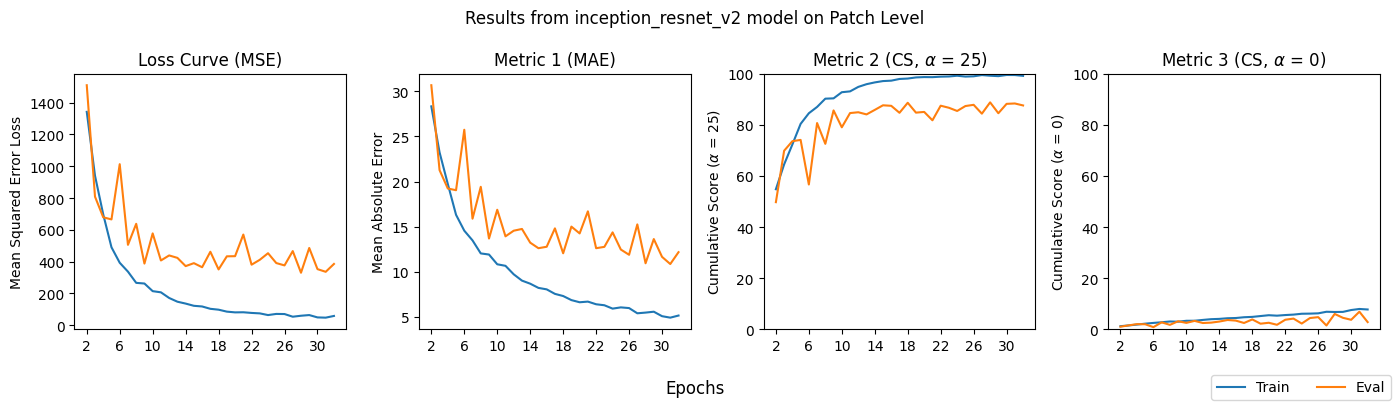

In [22]:
def epoch_plot(run_path, skip_n = 2):
    #"runs/Jan6-22-21-16/epoch_log_Jan6-22-21-16.csv"
    epoch_path = "epoch_log_" + run_path.split(os.sep)[1] + ".csv"
    
    with open(os.path.join(run_path, "settings.json"), "r") as f:
        settings = json.load(f)

    path = os.path.join(run_path, epoch_path)
    df = pd.read_csv(path)
    fig, axs = plt.subplots(1, 4, figsize=(14, 4))

    for set_type in ["train", "eval"]:
        set_df = df[df["set_type"] == set_type]
        
        loss_vals = set_df["mean_loss"].to_numpy()[skip_n:]
        mae_vals = set_df["mae"].to_numpy()[skip_n:]
        cs0_vals = set_df["cs_0"].to_numpy()[skip_n:]
        cs25_vals = set_df["cs_25"].to_numpy()[skip_n:]

        n_epochs = set_df.shape[0]
        x = np.arange(skip_n, n_epochs)

        titles = [("Mean Squared Error Loss", "Loss Curve (MSE)", loss_vals),
                  ("Mean Absolute Error", "Metric 1 (MAE)", mae_vals),
                  (r"Cumulative Score ($\alpha$ = 25)", r"Metric 2 (CS, $\alpha$ = 25)", cs25_vals),
                  (r"Cumulative Score ($\alpha$ = 0)", r"Metric 3 (CS, $\alpha$ = 0)", cs0_vals)]
        
        plots = []
        for ax, (y_label, title, y) in zip(axs, titles):
            ax.set_xticks(np.arange(skip_n, n_epochs + 1, 4)) # linspace instead
            plots.append(ax.plot(x, y, label=set_type.title()))
            ax.set_ylabel(y_label)
            ax.set_title(title)

        axs[2].set_ylim(0, 100)
        axs[3].set_ylim(0, 100)

    fig.subplots_adjust(wspace=0.3, top=0.8)
    fig.supxlabel("Epochs")
    fig.suptitle(f"Results from {settings['model_name']} model on Patch Level")
    fig.tight_layout()

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), loc="lower right", ncols=2)

    plot_name = os.path.basename(path).split(".")[0]
    plot_path = os.path.dirname(path)
    plt.savefig(os.path.join(plot_path, plot_name + ".png"), dpi=300)
    plt.savefig(os.path.join(plot_path, plot_name + ".pdf"))
    
    plt.show()

epoch_plot("runs/Jan6-22-21-16")